<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold; text-align: center">  Calcula Resultado Anual  </p>

In [1]:
from pandas import Series
import pandas as pd
from datetime import date, datetime
from IPython.display import display, Markdown
import matplotlib as mat
import numpy as np
import os
pd.__version__

'1.3.4'

In [2]:
import time
time.asctime( time.localtime(time.time()) )

'Wed Sep 24 14:52:21 2025'

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold; text-align: left">  ANO  </p>

In [4]:
ano = 2025

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 5px 5px 5px; font-weight: bold; text-align: center"> ______________________________________________________________________________________ </p>

In [5]:
# Setando definição de cores
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [6]:
import subprocess
p = subprocess.call(["powershell.exe", "copy 'Gerenciador de Ações.v6.xlsx' tempfile.xlsx"])

In [7]:
# Leitura de planilha Excel
ws = pd.read_excel('tempfile.xlsx', sheet_name="CÁLCULOS (3)", header=None)
# dt_acerto = ws[8][12]
dt_acerto = ws[8][12][1:11]
pc_liq_acerto = str(round(ws[5][13] * 100, 2)).replace('.', ',')
vr_liq_acerto = str(round(ws[5][12], 2)).replace('.', ',')
qt_acoes_acerto = int(float(str(ws[3][9])))
vr_acao_acerto = str(ws[3][10])

In [8]:
os.remove('tempfile.xlsx')

In [9]:
print([dt_acerto, pc_liq_acerto, vr_liq_acerto, qt_acoes_acerto, vr_acao_acerto])

['24/09/2025', '1,06', '584,42', 12800, '4.35']


In [10]:
# Setando variáveis

valor_acerto = 0
arquivo_csv = 'arquivos/relatorioOperacoes' + str(ano) + '.csv'

# Data da Operação, Tipo Operação, Característica, Ativo, Corretora, Qtde, Preço (R$), Custo Médio (R$), %, Resultado (R$)
matrix_acerto = [['01/07/2020', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '-20,79', '0,00'      ],
                 ['01/09/2020', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '2,66',   '0,00'      ],
                 ['02/02/2021', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '-1,84',  '0,00'      ],
                 ['17/06/2021', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '1,75',   '0,00'      ],
                 ['25/09/2024', 'acerto', 'acerto',   'acerto', 'acerto',  '0.00', '0.00', 0,  '2,06',   '0,00'      ],
                 ['18/10/2024', 'Dividendos', 'acerto', 'EVEN3', 'acerto', 8900 , '0.00', 0,  '0,00', '3560,00'],
                 ['28/09/2023', 'PAGMTO FRACOES', 'acerto', 'BRPR3', 'acerto', 0 , '0.00', 0,  '0,00', '427,41'],
                 ['14/09/2023', 'Restituição de Capital', 'acerto', 'BRPR3 ', 'acerto', 389 , '0.00', 0,  '0,00', '24527,73'],
                 ['22/03/2023', 'PG.JUR.CAP.PROP', 'acerto', 'VALE3', 'acerto', 1100 , '0.00', 0,  '0,00', '273,03'],
                 ['20/07/2022', 'Dividendos', 'acerto', 'PETR4', 'acerto', 3400 , '0.00', 0,  '0,00', '6316,33'],
                 ['20/06/2022', 'Dividendos', 'acerto', 'PETR4', 'acerto', 3400 , '0.00', 0,  '0,00', '4853,73'],
                 ['20/06/2022', 'PG.JUR.CAP.PROP', 'acerto', 'PETR4', 'acerto', 3400 , '0.00', 0,  '0,00', '1243,21'],
                 ['05/04/2022', 'Dividendos', 'acerto', 'PTBL3', 'acerto', 16000, '0.00', 0,  '0,00', '395,94'],
                 ['31/05/2021', 'Dividendos', 'acerto', 'USIM5', 'acerto', 6100 , '0.00', 0,  '0,00', '804,68'],
                 ['30/04/2021', 'Dividendos', 'acerto', 'UNIP6', 'acerto', 1700 , '0.00', 0,  '0,00', '284,95'],
                 ['30/04/2021', 'Dividendos', 'acerto', 'UNIP6', 'acerto', 1700 , '0.00', 0,  '0,00', '1791,96'],
                 ['18/11/2020', 'Dividendos', 'acerto', 'GGBR4', 'acerto', 5700 , '0.00', 0,  '0,00', '684,00'],
                 ['20/08/2020', 'PG.JUR.CAP.PROP', 'acerto', 'BIDI4', 'acerto', 7500 , '0.00', 0,  '0,00', '67,27'],
                 ['01/07/2020', 'Dividendos', 'acerto', 'ITSA4', 'acerto', 1100 , '0.00', 0,  '0,00', '22,00'],
                 ['14/06/2019', 'PG.JUR.CAP.PROP', 'acerto', 'BPAN4', 'acerto', 2000 , '0.00', 0,  '0,00', '129,11'],
                 ['09/05/2018', 'Dividendos', 'acerto', 'SUZB3', 'acerto', 500 , '0.00', 0,  '0,00', '96,11'],
                 ['09/11/2017', 'PAGMTO FRACOES', 'acerto', 'PPLA11', 'acerto', 0 , '0.00', 0,  '0,00', '0,38    '],
                 ['02/09/2016', 'Dividendos', 'acerto', 'GGBR4', 'acerto', 2000 , '0.00', 0,  '0,00', '60,00'],
                 [dt_acerto, 'Venda (planilha)', 'acerto', 'acerto', 'acerto', qt_acoes_acerto, vr_acao_acerto, 0, pc_liq_acerto, vr_liq_acerto]
                ]

In [11]:
# Usando o método read_csv
df = pd.read_csv(arquivo_csv, delimiter=";", encoding='ansi', decimal=",")

In [12]:
del df["Data da Operação"]
df = df.rename(columns = {"Unnamed: 0" : "Data da Operação",
                          "Lucro/Perda (R$)" : "Resultado (R$)"})

In [13]:
#Substitui NaN por "-"
df = df.fillna("-")

In [14]:
# Copia coluna "Resultado (R$)" para novo Dataframe dfTemp
dfTemp = df["Resultado (R$)"]
dfFinal = df

In [15]:
# Exclui coluna "Resultado (R$)" do Dataframe dfFinal
del dfFinal["Resultado (R$)"]

In [16]:
# Copia índices para exclusão do dfTemp
index = df[df['Ativo'] != '-'].index
# Exclui linhas nulas do dfTemp
dfTemp.drop(index, inplace=True)

In [17]:
# Reorganiza índice dfTemp
dfTemp.index = pd.Categorical(dfTemp.index).codes

In [18]:
# Copia índices para exclusão do dfFinal
index = df[df['Ativo'] == '-'].index
# Exclui linhas nulas do dfFinal
dfFinal.drop(index, inplace=True)

In [19]:
# Reorganiza índice dfFinal
dfFinal.index = pd.Categorical(dfFinal.index).codes

In [20]:
dfFinal[dfTemp.name] = dfTemp

In [21]:
# Conversão da coluna Data de Operação para tipo Data
dfFinal['Data da Operação'] = pd.to_datetime(dfFinal['Data da Operação'], format='%d/%m/%Y')

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold; text-align: left">  Aplica acertos  </p>

In [22]:
start_date= datetime.strptime(f'{ano}-01-01', '%Y-%m-%d')
end_date = datetime.strptime(f'{ano}-12-31', '%Y-%m-%d')

df_acerto = pd.DataFrame(matrix_acerto, columns=dfFinal.columns)
df_acerto['Data da Operação'] = pd.to_datetime(df_acerto['Data da Operação'], format='%d/%m/%Y')
mask = (df_acerto['Data da Operação'] >= start_date) & (df_acerto['Data da Operação'] <= end_date)
df_acerto = df_acerto.loc[mask]

df = pd.concat([dfFinal, df_acerto], ignore_index=True)

In [23]:
dfFinal = df.sort_values(['Data da Operação', 'Tipo Operação'], ascending=[True, False])

In [24]:
# Ajustando caracter de decimal e milhar em "Resultado (R$)", e conversão para float
dfFinal['Resultado (R$)'] = [x.replace('.','') for x in dfFinal['Resultado (R$)']]
dfFinal['Resultado (R$)'] = [x.replace(',','.') for x in dfFinal['Resultado (R$)']]
dfFinal['Resultado (R$)'] = dfFinal['Resultado (R$)'].astype(float)

In [25]:
# Removendo sinal de % para cálculos, e conversão para float
dfFinal['%'] = [x.replace(' %','') for x in dfFinal['%']]
dfFinal['%'] = [x.replace(',','.') for x in dfFinal['%']]
dfFinal['%'] = dfFinal['%'].astype(float)

In [26]:
dfFinal = dfFinal.drop(['Característica', 'Corretora'], axis=1)

In [27]:
dfFinal['Qtde'] = dfFinal['Qtde'].astype(str)
dfFinal['Qtde'] = [x.replace('.','') for x in dfFinal['Qtde']]
dfFinal['Qtde'] = dfFinal['Qtde'].astype(int)

In [28]:
dfFinal.iloc[-1].index

Index(['Data da Operação', 'Tipo Operação', 'Ativo', 'Qtde', 'Preço (R$)',
       'Custo Médio (R$)', '%', 'Resultado (R$)'],
      dtype='object')

In [29]:
# Excluir linha de acerto da planilha caso o valor já esteja lançado.
if dfFinal.iloc[-1]['Resultado (R$)'] == dfFinal.iloc[-2]['Resultado (R$)']:
    dfFinal=dfFinal.drop(dfFinal.index[-1])

In [30]:
dfFinal['Preço (R$)'] = dfFinal['Preço (R$)'].astype(float)

In [31]:
# Calcula vr_compra
vr_compra_bruto = dfFinal['Qtde'] * dfFinal['Preço (R$)']

In [32]:
# Ajuste Na cisão de AZEV4
# if ano == 2025:
#     data_azev3 = pd.to_datetime("2025-02-18", format='%Y/%m/%d')
#     data_azev3_idx = dfFinal.loc[(dfFinal["Data da Operação"] == data_azev3) & 
#                                  (dfFinal["Ativo"] == "AZTE3")]["Custo Médio (R$)"].index[0]
    
#     dfFinal.at[data_azev3_idx, "Custo Médio (R$)"] = 0
#     dfFinal.at[data_azev3_idx, "Resultado (R$)"] = dfFinal["Qtde"][data_azev3_idx] * dfFinal["Preço (R$)"][data_azev3_idx]

In [33]:
emolumentos = 325 / 1000000
corretagem = 49 / 10
vr_compra = vr_compra_bruto + corretagem + (vr_compra_bruto * emolumentos)

In [34]:
dfFinal['Valor Compra'] = vr_compra

In [35]:
# dfFinal.style.applymap(color_negative_red, subset=['%','Lucro/Perda (R$)'])

In [36]:
# Cria Dataframe com apenas Porcentagem e Lucro/Perda (R$)
df_sum = dfFinal[['%', 'Resultado (R$)']].copy()

In [37]:
df_sum = df_sum.rename(columns = {"%" : "Porcentagem"})

In [38]:
# Corrigir erro na GOLL4, dia 27/05/2025
result = dfFinal[dfFinal["Resultado (R$)"] == -24346.77]
if not result.empty:
    result_index = result.index[0]
    dfFinal.at[result_index, "Resultado (R$)"] = 2769.48
    dfFinal.at[result_index, "%"] = 4.10

In [39]:
# Corrigir valores de GOLL54, que tem fator 1000
dfFinal["Valor Compra"] = np.where(dfFinal["Ativo"] == "GOLL54", dfFinal["Valor Compra"] / 1000, dfFinal["Valor Compra"])

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold; text-align: left">  Totaliza lucros e prejuízos  </p>

In [40]:
# Agrupa por mês totalizando o lucro/Prejuízo
df_sum_lucro_perda = dfFinal.groupby(dfFinal['Data da Operação']
                                     .dt.strftime('%B'))['Resultado (R$)'].sum()

In [41]:
# Totaliza lucros
df_lucros = dfFinal.loc[dfFinal['Resultado (R$)'] > 0] \
                   .groupby(dfFinal['Data da Operação']
                   .dt.strftime('%B'))['Resultado (R$)']
df_sum_lucros = df_lucros.sum()
df_qt_lucros  = df_lucros.count()

# Totaliza Prejuízos
df_perdas = dfFinal.loc[dfFinal['Resultado (R$)'] < 0] \
                   .groupby(dfFinal['Data da Operação']
                   .dt.strftime('%B'))['Resultado (R$)']
df_sum_perdas = df_perdas.sum()
df_qt_perdas  = df_perdas.count()

In [42]:
# Agrupa por mês totalizando a Porcentagem
df_sum_porcentagem = dfFinal.groupby(dfFinal['Data da Operação']
                                     .dt.strftime('%B'))['%'].sum()

In [43]:
dfFinal_teste = dfFinal.groupby(['Data da Operação', 'Tipo Operação']).sum(['Resultado (R$)', 'Valor Compra'])
dfFinal_teste.reset_index(drop=False, inplace=True)

In [44]:
# del dfFinal_teste['Preço (R$)']
del dfFinal_teste['%']
dfFinal_teste['%'] = (dfFinal_teste['Resultado (R$)'] * 100) / dfFinal_teste['Valor Compra']

In [45]:
dfFinal_teste['Data da Operação'] = pd.to_datetime(dfFinal_teste['Data da Operação'], format='%d/%m/%Y')
df_sum_porcentagem_teste = dfFinal_teste.groupby(dfFinal_teste['Data da Operação']
                                        .dt.strftime('%B'))['%'].sum()

In [46]:
array_meses = [4,8,12,2,1,7,6,3,5,11,10,9]
meses = []
if date.today().year == ano:
    for x in array_meses:
        if x <= date.today().month:
            meses.append(x)
else:
    meses = array_meses

In [47]:
# corrige lista de meses se mês atual não tiver operações
if len(meses) > len(df_sum_lucro_perda):
    meses.remove(max(meses))

In [48]:
# Cria DataFrame
df_tot_mes = pd.DataFrame({'mes':meses
                         ,'Mês':df_sum_lucro_perda.index.values
                         ,'Resultado (R$)':df_sum_lucro_perda
                         ,'Porcentagem':df_sum_porcentagem
                         ,'Total Lucros':df_sum_lucros
                         ,'Total Perdas':df_sum_perdas
                         ,'Qt Lucros':df_qt_lucros
                         ,'Qt Perdas':df_qt_perdas
                          }).set_index('mes')

In [49]:
df_tot_mes['Total Lucros'] = df_tot_mes['Total Lucros'].fillna(0.00)
df_tot_mes['Total Perdas'] = df_tot_mes['Total Perdas'].fillna(0.00)
df_tot_mes['Qt Lucros'] = df_tot_mes['Qt Lucros'].fillna(0).astype(int)
df_tot_mes['Qt Perdas'] = df_tot_mes['Qt Perdas'].fillna(0).astype(int)

In [50]:
df_tot_mes.sort_index(inplace=True)

In [51]:
# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [52]:
# Calculando total do ano
resultado = round(df_sum['Resultado (R$)'].sum(), 2)
porcentagem = round(df_sum['Porcentagem'].sum(), 2)
total_lucros = round(df_tot_mes['Total Lucros'].sum(), 2)
total_perdas = round(df_tot_mes['Total Perdas'].sum(), 2)
qt_lucros = round(df_tot_mes['Qt Lucros'].sum(), 2)
qt_perdas = round(df_tot_mes['Qt Perdas'].sum(), 2)
resultado_txt = 'Lucro: ' if resultado >= 0 else 'Prejuízo...: '
porcentagem_txt = '> Porcentagem: '
# Markdown(f'{porcentagem_txt}**{porcentagem}%**<br>{resultado_txt}**R${resultado}**')

In [53]:
# Adicionando Total do Ano
df_tot_mes.loc[len(df_tot_mes) + 1] = ['== Ano ==', resultado, porcentagem, total_lucros, total_perdas, qt_lucros, qt_perdas]
df_tot_mes.rename(index={len(df_tot_mes) : 'Total'}, inplace=True)

In [54]:
# df_tot_mes.style.applymap(color_negative_red, subset=['Lucro/Perda (R$)','Porcentagem'])
# df_tot_mes

In [55]:
# Calcula mediana to valor total usado para compras
teste = dfFinal.loc[dfFinal["Tipo Operação"] == "Compra"].drop(columns=["Ativo"])
teste['AnoMes'] = teste['Data da Operação'].dt.to_period('M')
resultado = teste.groupby('AnoMes')['Valor Compra'].agg(['mean', 'median']).reset_index()
resultado.loc[len(resultado) + 1] = [resultado["AnoMes"][0], 0, resultado["median"].median()]
resultado = resultado.reset_index(drop=True)
resultado.index += 1
resultado.rename(index={len(resultado) : 'Total'}, inplace=True)
df_tot_mes["Mediana Compras"] = resultado["median"]
df_tot_mes["Porcentagem Relatório"] = df_tot_mes["Porcentagem"]
df_tot_mes["Porcentagem"] = df_tot_mes["Resultado (R$)"] / df_tot_mes["Mediana Compras"]

In [56]:
# teste
# df_tot_mes = df_tot_mes.style.set_table_styles([dict(selector="th",props=[('max-width', '90px'), ('text-align', 'center')])])

In [57]:
df_tot_mes_format = df_tot_mes.copy()
df_tot_mes_format["Porcentagem Relatório"] = df_tot_mes_format["Porcentagem Relatório"] * 0.01
df_tot_mes_format = df_tot_mes_format.style.applymap(color_negative_red, subset=['Resultado (R$)'
                                                                                 ,'Porcentagem'
                                                                                 ,'Total Lucros'
                                                                                 ,'Total Perdas'
                                                                                 ,'Mediana Compras'
                                                                                 ,'Porcentagem Relatório'
                                                                                ]) \
                                           .set_table_styles([dict(selector="th",props=[('max-width', '90px')
                                                                                      , ('text-align', 'center')])
                                                             ])
df_tot_mes_format = df_tot_mes_format.format(
    {
    "Resultado (R$)": "{:,.2f}".format,
    "Porcentagem": "{:,.2%}".format,
    "Total Lucros": "{:,.2f}".format,
    "Total Perdas": "{:,.2f}".format,
    "Mediana Compras": "{:,.2f}".format,
    "Porcentagem Relatório": "{:,.2%}".format
})

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold; text-align: left">  Detalhamento  </p>

In [58]:
dfFinal['Qtde'] = dfFinal.loc[:, 'Qtde'].astype(int).map('{:,}'.format)
dfFinal["%"] = dfFinal["%"].apply(lambda x: x * 0.01)
dfFinal["%"] = dfFinal["%"].map('{:.2%}'.format)
dfFinal

,Data da Operação,Tipo Operação,Ativo,Qtde,Preço (R$),Custo Médio (R$),%,Resultado (R$),Valor Compra
0,2025-01-03,Compra,RCSL3,"10,000",5.40,0.00,0.00%,0.00,"54,022.45"
1,2025-01-06,Venda,RCSL3,"10,000",5.65,5.40,4.75%,"2,566.82","56,523.26"
2,2025-01-07,Compra,RCSL3,"12,700",4.48,0.00,0.00%,0.00,"56,919.39"
4,2025-01-08,Venda,RCSL3,"12,700",4.33,4.48,-3.18%,"-1,811.60","55,013.77"
3,2025-01-08,Compra,ONCO3,"26,000",2.11,0.00,0.00%,0.00,"54,882.73"
5,2025-01-09,Venda,ONCO3,"26,000",2.13,2.11,1.36%,746.85,"55,402.90"
6,2025-01-09,Compra,RCSL3,"11,800",4.62,0.00,0.00%,0.00,"54,538.62"
7,2025-01-10,Venda,RCSL3,"11,800",4.76,4.62,3.18%,"1,736.75","56,191.15"
8,2025-01-13,Compra,RCSL3,"4,200",4.66,0.00,0.00%,0.00,"19,583.26"
10,2025-01-14,Venda,RCSL3,"4,200",4.80,4.66,3.15%,618.06,"20,171.45"


<IPython.core.display.Javascript object>


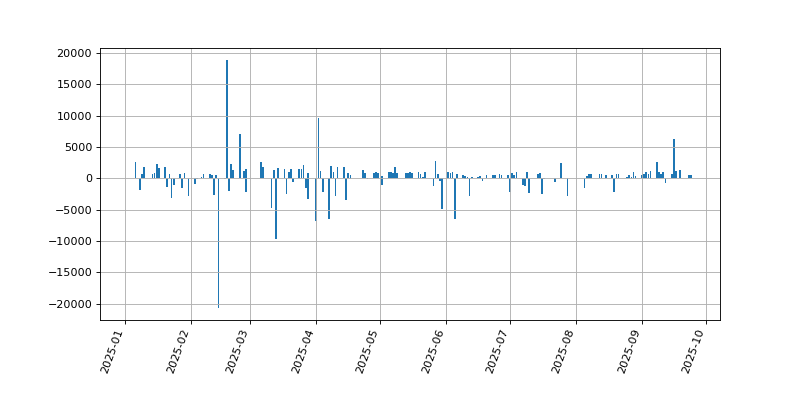

In [59]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.grid()
fig.autofmt_xdate()
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=0.20)
plt.bar(dfFinal[dfFinal.columns.values[0]], dfFinal[dfFinal.columns.values[7]])
plt.show()

<p style="color:white; background-color: #366092; font-size: 15pt; padding: 5px 0px 5px 10px; font-weight: bold; text-align: left">  Resultado  </p>

In [60]:
df_tot_mes_format

,Mês,Resultado (R$),Porcentagem,Total Lucros,Total Perdas,Qt Lucros,Qt Perdas,Mediana Compras,Porcentagem Relatório
mes,,,,,,,,,
1,January,"2,491.73",4.49%,"14,312.75","-11,821.02",11,6,"55,525.44",7.59%
2,February,"7,090.31",13.67%,"35,530.94","-28,440.63",12,7,"51,851.74",88.95%
3,March,"-5,854.89",-8.32%,"17,381.07","-23,235.96",11,7,"70,385.27",-15.25%
4,April,"1,475.46",2.29%,"23,772.11","-22,296.65",15,8,"64,395.82",3.46%
5,May,"7,813.69",11.42%,"15,710.66","-7,896.97",17,5,"68,397.12",9.90%
6,June,-926.04,-1.83%,"8,853.70","-9,779.74",16,4,"50,734.88",2.24%
7,July,"-6,515.24",-12.83%,"7,374.60","-13,889.84",12,10,"50,771.39",105.21%
8,August,"4,351.24",11.18%,"8,038.75","-3,687.51",16,2,"38,913.54",21.27%
9,September,"19,529.97",42.49%,"20,283.17",-753.20,16,1,"45,961.83",53.69%
